In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u

import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
mh = '+0.0'
CtoO = '1.0'


filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/sonora_2020_feh+000_co_100.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)


In [6]:
Teff_ar = np.array([1000])
grav_ar = np.array([1000])
kzz=np.array([1e-500])


gases_fly = ['CO','CH4','H2O','NH3','CO2','N2','HCN','H2','PH3','C2H2','Na','K']

for iii in range(len(kzz)):
    T_eff= Teff_ar[0]
    grav = grav_ar[0]
    nlevel = 91

    ## Brown Dwarf 
    T_star = "NA"
    semi_major = "NA" # AU
    self_consistent_kzz= False # Only needed if you want to do on-the-fly calculation with MLT Kzz
    cl_run = jdi.inputs(calculation="brown", climate = True)

    cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
    cl_run.T_eff(Teff=T_eff)




    #pressure=np.logspace(np.log10(1.77000392e-04),np.log10(80.0),nlevel) # set your pressure grid
    temp_guess = np.zeros(shape=(nlevel))
    kz = np.zeros(shape =(nlevel))

    ## load a bobcat model
    pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(Teff_ar[0])+"g"+str(grav_ar[0])+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
    pressure=pressure_dummy
    #pressure = np.logspace(np.log10(1.7e-4),np.log10(400),91)
    for i in range(len(temp_guess)):
        temp_guess[i] = temp_guess[i] # perturb the profile
        kz[i] = kzz[iii] #0

    nofczns = 1
    nstr = np.array([0,77,89,0,0,0]) # initial guess of convective zones
    rfacv = 0.0
    rfaci =1.0
    cloudy = False # not cloudy
    fsed = 0.0
        ##
    cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed)
    pressure , temp, dtdp, nstr_new, flux_plus_final,quench_levels, df, all_profiles, all_kzz,opd_,g0_,w0_ = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False,on_fly=True,gases_fly=gases_fly)
    
    
    

Iteration number  0 , min , max temp  356.1175017029076 2889.781856658416 , flux balance  6.550724413925099e-05
Converged Solution in iterations  0
Big iteration is  356.1175017029076 0
Iteration number  0 , min , max temp  356.11477237608113 2890.9294382073385 , flux balance  -4.953983282989073e-07
Converged Solution in iterations  0
Profile converged
Iteration number  0 , min , max temp  356.1059864137415 2891.200209514782 , flux balance  -5.990815801005752e-07
Converged Solution in iterations  0
Big iteration is  356.1059864137415 0
Iteration number  0 , min , max temp  356.10726721671796 2891.262105191752 , flux balance  -1.495575560016808e-07
Converged Solution in iterations  0
Profile converged
final [ 0 77 89  0  0  0]
Iteration number  0 , min , max temp  356.1080800098111 2891.2768983538167 , flux balance  -3.688873090197591e-08
Converged Solution in iterations  0
Big iteration is  356.1080800098111 0
 We are already at a root, tolf , test =  5e-05 ,  1.771247619228246e-05
Pro

In [4]:
path = "/Users/sagnickmukherjee/Documents/GitHub/picaso/Benchmarking/onfly/"

filename= path+"tpfile/tp_allonfly_noh2o_planet_"+str(Teff_ar[0])+"_grav_"+str(grav_ar[0])+"_eq.dat"
np.savetxt(filename, np.transpose([pressure,temp]), header= str("nstr "+str(nstr_new)+" T_eff "+str(T_eff)+" grav "+ str(grav)+" kz "+str(kz[0])+" T_star "+str(T_star)+" semi-major[AU] "+str(semi_major)))        

csv = path+"profile/profile_allonfly_noh2o_planet_"+str(Teff_ar[0])+"_grav_"+str(grav_ar[0])+"_eq.dat"
df.to_csv(csv,sep='\t')

hist = path+"hist/hist_allonfly_noh2o_planet_"+str(Teff_ar[0])+"_grav_"+str(grav_ar[0])+"_eq.dat"
np.savetxt(hist, all_profiles)

hist = path+"hist/hist_kz_allonfly_noh2o_planet_"+str(Teff_ar[0])+"_grav_"+str(grav_ar[0])+"_eq.dat"
np.savetxt(hist, all_kzz)

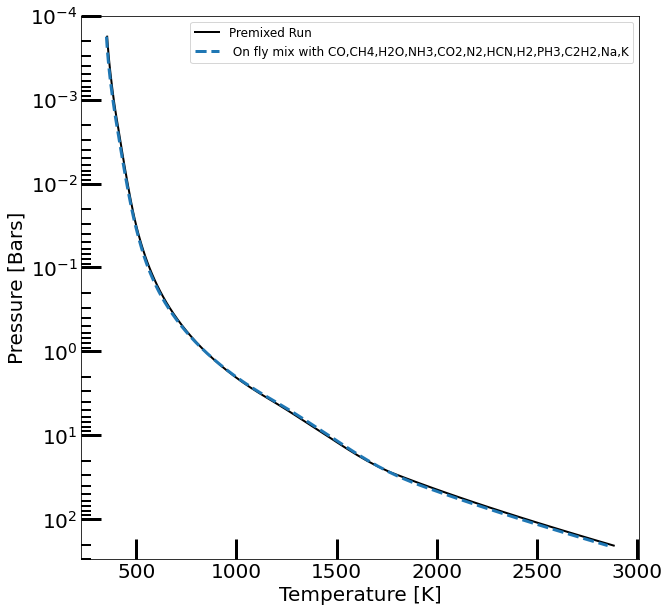

In [9]:
pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(Teff_ar[0])+"g"+str(grav_ar[0])+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)


plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]",fontsize=20)
plt.xlabel("Temperature [K]",fontsize=20)

plt.ylim(300,1e-4)
plt.semilogy(temp_guess,pressure_dummy,linewidth=2,color="k",label="Premixed Run")
plt.semilogy(temp,pressure,linestyle="--",linewidth=3,label=" On fly mix with CO,CH4,H2O,NH3,CO2,N2,HCN,H2,PH3,C2H2,Na,K")

plt.tick_params(axis='y',which='major',length =20, width=3,direction='in',labelsize=20)
plt.tick_params(axis='y',which='minor',length =10, width=2,direction='in',labelsize=20)
plt.tick_params(axis='x',which='major',length =20, width=3,direction='in',labelsize=20)
plt.tick_params(axis='x',which='minor',length =10, width=2,direction='in',labelsize=20)
plt.legend(fontsize=12)